### Sprawozdanie - Równania różniczkowe i zagadnienia początkowe
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Metoda Rungego-Kutty

Zaimplementuj metodę Rungego-Kutty czwartego rzędu (rozdział 10.2, Kincaid i Cheney), a następnie:
1. Opisz zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora.

2. Rozwiąż zagadnienie początkowe dane równaniem $x' = x/t + t\sec(x/t)$ z warunkiem początkowym $x(0) = 0$.
Przedłuż rozwiązanie do $t = 1$ z krokiem $h=2^{-7}$. Porównaj wynik z dokładnym rozwiązaniem: $x(t) = t * arc\sin(t)$.

3. Używając tej samej metody rozwiąż zagadnienie początkowe dane równaniem $x' = 100(\sin(t) - x)$
z warunkiem początkowym $x(0) = 0$ na przedziale $[0,3]$ używając kroków o rozmiarach $h = 0.015,0.02,0.025,0.03$.
Opisz z czego wynikają różnice w rozwiązaniach.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

Rozpocząłem od zaimplementowania podanego pseudokodu.

In [2]:
def metoda_Rungego_Kutty(f, t, x, h, n):
    wszystkie_j = []
    wszystkie_t = []
    wszystkie_x = []

    t_a = t

    for j in range(1,int(n+1)):
        K_1 = h * f(    t,          x           )
        K_2 = h * f(    t + h/2,    x + K_1/2   )
        K_3 = h * f(    t + h/2,    x + K_2/2   )
        K_4 = h * f(    t + h,      x + K_3     )

        t = t_a + j * h
        x = x + (K_1 + 2 * K_2 + 2 * K_3 + K_4)/6

        wszystkie_j.append(j)
        wszystkie_t.append(t)
        wszystkie_x.append(x)

    return wszystkie_j, wszystkie_t, wszystkie_x

#### 1.1
Metoda Rungego-Kutty jest lepsza od metody z szeregami Taylora w tej kwestii, że nie wymaga analitycznego różniczkowania oryginalnego równania różniczkowego.

Umożliwia ona uzyskanie rozwiązania $f$ bez żmudnych obliczeń wstępnych.

#### 1.2

Napisałem funkcję, która porównuje mi wyniki.

In [3]:
def test(f, t, x, h, n):

    wartosci_j, wartosci_t, wartosci_x = metoda_Rungego_Kutty(f,t,x,h,n)
    dokladne_wartosci_x = wartosci_t * np.arcsin(wartosci_t)

    fig1, axis = plt.subplots(2, figsize=(10,8))

    axis[0].set_title("Porównanie rozwiązań - algebraicznego i numerycznego")
    axis[0].set_xlabel("Wartość t")
    axis[0].set_ylabel("x(t)")

    axis[0].plot(wartosci_t, wartosci_x, label="Metoda Rungego-Kutty czwartego rzędu", c=(0.99, 0.15, 0.15, 0.5))
    axis[0].plot(wartosci_t, dokladne_wartosci_x, label="x(t) = t * arcsin(t)", c=(0.15, 0.15, 0.99, 0.5))

    axis[1].set_title("Różnica między rozwiązaniami - algebraicznym i numerycznym")
    axis[1].set_xlabel("Wartość t")
    axis[1].set_ylabel("Wartość różnicy")

    axis[1].plot(wartosci_t, abs(wartosci_x - dokladne_wartosci_x))

    axis[0].legend()
    fig1.tight_layout()
    fig1.show()

Wywołam więc funkcję `test()` dla zadanych danych.

In [4]:
def f_1(t,x):
    return x/t + t * mpmath.sec(x/t)


<ipython-input-3-8b46488722b2>:4: RuntimeWarning: invalid value encountered in arcsin
  dokladne_wartosci_x = wartosci_t * np.arcsin(wartosci_t)
<ipython-input-3-8b46488722b2>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


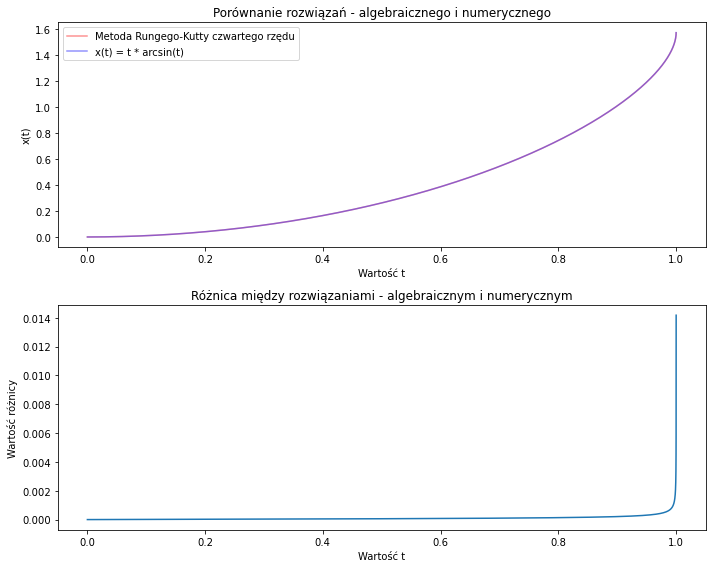

In [5]:
test( f=f_1, t = 1e-4, x = 0, h = 1e-4, n = 1e4 )
#test( f=f_1, t = 1e-7, x = 0, h = 1e-7, n = 1e7 )

Wynik funkcji zaimplementowanej przeze mnie rysuję na czerwono, ale z `alpha = 0.5`; podobnie dokładne rozwiązanie - na niebiesko z `alpha = 0.5`.

Na wykresie widzimy kolor fioletowy - jest to wynik nakładania się kolorów czerwonego i niebieskiego, co oznacza, że te wyniki są bardzo do siebie zbliżone (jak nie identyczne).

Potwierdza to też wykres różnic, gdzie różnica prawie wszędzie wynosi `~0.000`.


#### 1.3

Stworzę nową funkcję, podobną do `test()`, ale nie porównującą z funkcją dokładną.

In [6]:
def pokaz_Rungego_Kutta(f, t, x, h, n):

    wartosci_j, wartosci_t, wartosci_x = metoda_Rungego_Kutty(f,t,x,h,n)

    fig1, axis = plt.subplots(figsize=(10,4))

    axis.set_title("Wyniki rozwiązania równania metodą Rungego-Kutty")
    axis.set_xlabel("Wartość t")
    axis.set_ylabel("x(t)")

    axis.plot(wartosci_t, wartosci_x, label="Metoda Rungego-Kutty czwartego rzędu", c=(0.99, 0.15, 0.15, 0.5))

    axis.legend()
    fig1.tight_layout()
    fig1.show()

In [7]:
def f_2(t,x):
    return 100 * (np.sin(t) - x)

`h = 0.015`

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


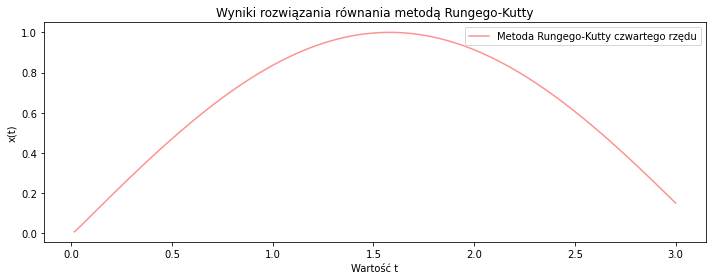

In [8]:
obecne_h = 0.015
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )


`h = 0.020`

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


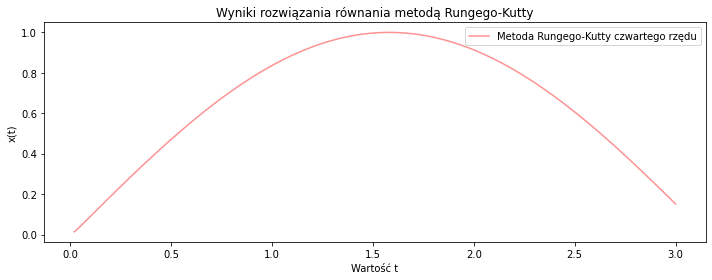

In [9]:
obecne_h = 0.02
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )


`h = 0.025`

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


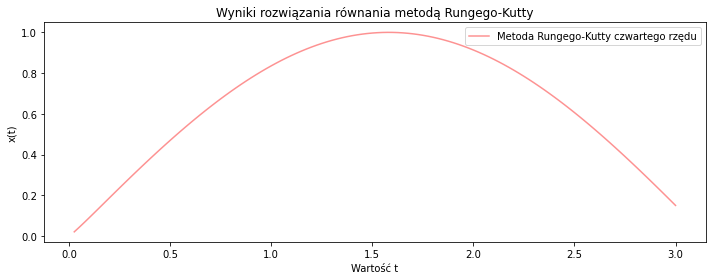

In [10]:
obecne_h = 0.025
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

`h = 0.030`

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


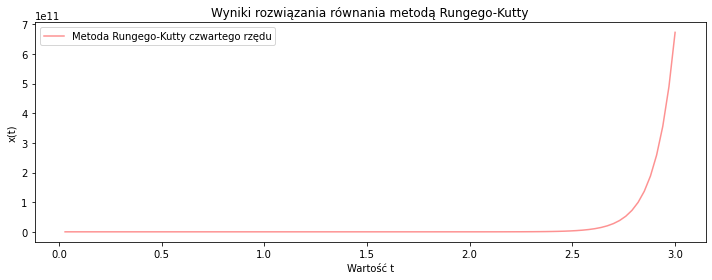

In [11]:
obecne_h = 0.03
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

Dla `h = 0.030` nastąpiło niespodziewane zachowanie.

Badam zatem, jak ta funkcja się "psuje".

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


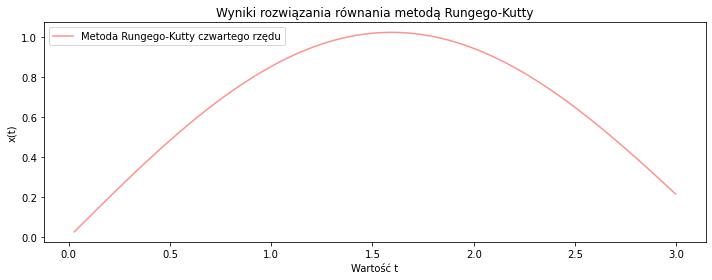

In [12]:
obecne_h = 0.028
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


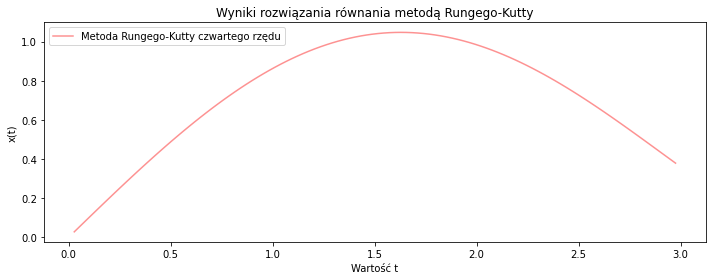

In [13]:
obecne_h = 0.0280625
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


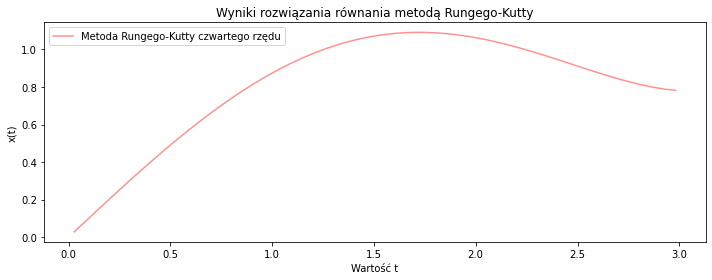

In [14]:
obecne_h = 0.028125
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )


<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


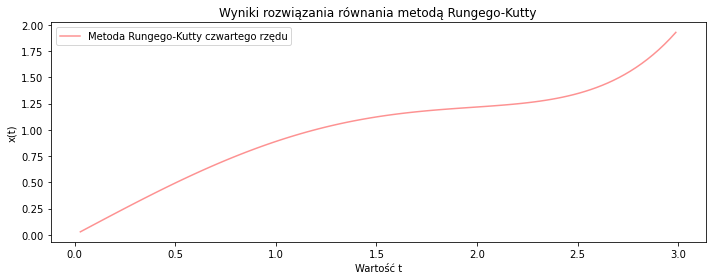

In [15]:
obecne_h = 0.0281875
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


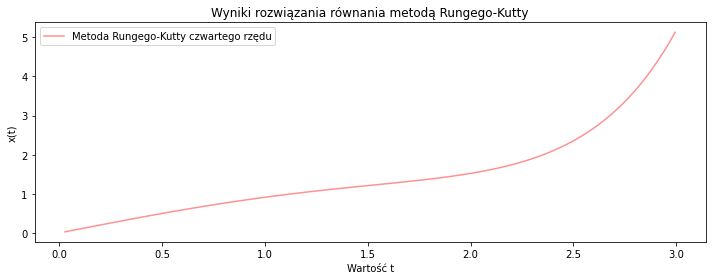

In [16]:
obecne_h = 0.02825
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

<ipython-input-6-538c8c35695d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


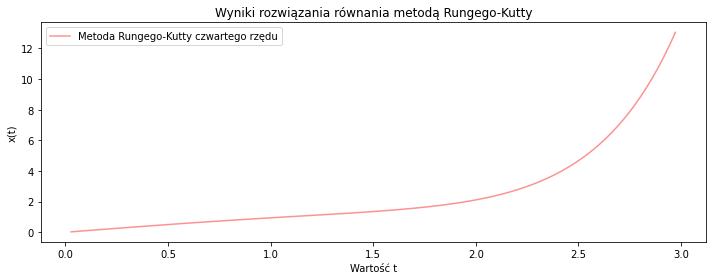

In [17]:
obecne_h = 0.0283125
pokaz_Rungego_Kutta( f=f_2, t = 0, x = 0, h = obecne_h, n = 3.0/obecne_h )

Po tej analizie + doszukaniu w źródłach sądzę, że jest to kwestia "błędu metody" ("truncation error").

Ten błąd jest lokalnie rzędu $O(h^{5})$, a globalnie $O(h^{4})$.

Przy adaptacyjnej metodzie może wyeliminuję ten błąd.



#### Zadanie 2 - Adaptacyjna metoda Rungego-Kutty-Fehlberga

Zaimplementuj metodę Rungego-Kutty-Fehlberga (rozdział 10.3, Kincaid i Cheney)
i użyj jej do rozwiązania zagadnienia początkowego:
$x' = 3x/t + 9/2t - 13$ z warunkiem brzegowym $x(3) = 6$ w punkcie $x(1/2)$ z dokładnością do 9 miejsc po przecinku.
Porównaj wynik z rozwiązaniem analitycznym $x=t^{3} - 9/2t^{2} +13/2t$.
W jaki sposób metoda adaptacyjna pozwala nam zwiększyć dokładność rozwiązania? Jakie są tego wady?

Implementuję metody podane w Kincaidzie i Cheneyu.

In [18]:
def metoda_Rungego_Kutty_Fehlberga(f, t, x, h):

    K_1 = h * f(    t,              x           )
    K_2 = h * f(    t + h/4,        x + K_1/4   )
    K_3 = h * f(    t + h*3/8,      x + K_1*3/32 +      K_2*9/32   )
    K_4 = h * f(    t + h*12/13,    x + K_1*1932/2197 - K_2*7200/2197 + K_3*7296/2197     )
    K_5 = h * f(    t + h,          x + K_1*439/216 -   K_2*8 +         K_3*3680/513 -  K_4*845/4104     )
    K_6 = h * f(    t + h/2,        x - K_1*8/27 +      K_2*2 -         K_3*3544/2565 + K_4*1859/4104 - K_5*11/40 )


    t = t + h
    x_4 = x + K_1*25/216 + K_3*1408/2565 +  K_4*2197/4104 -     K_5*2/10
    x   = x + K_1*16/135 + K_3*6656/12825 + K_4*28561/56430 -   K_5*9/50 + K_6*2/55
    epsilon = abs(x - x_4)

    return t, x, epsilon


In [19]:
def metoda_adaptacyjna_Rungego_Kutty_Fehlberga(f, t, x, h, t_b, itmax, epsilon_max, epsilon_min, h_min, h_max):
    delta = 1e-5 / 2
    iflag = 1
    k = 0

    wartosci_x = []
    wartosci_h = []
    wartosci_t = []

    while k <= itmax:
        k = k+1
        if abs(h) < h_min:
            h = h/abs(h) * h_min
        if abs(h) > h_max:
            h = h/abs(h) * h_max

        d = abs(t_b - t)
        if d <= abs(h):
            iflag = 0
            if d <= delta * max(abs(t_b), abs(t)):
                break
            h = h/abs(h) * d
        x_save = x
        t_save = t

        t, x, epsilon = metoda_Rungego_Kutty_Fehlberga(f,t,x,h)

        wartosci_x.append(x)
        wartosci_t.append(t)
        wartosci_h.append(h)

        if iflag == 0:
            break
        if epsilon < epsilon_min:
            h = h * 2
        elif epsilon > epsilon_max:
            h = h / 2
            x = x_save
            t = t_save
            k = k - 1

            wartosci_x.pop()
            wartosci_h.pop()
            wartosci_t.pop()


    return wartosci_x, wartosci_t, wartosci_h

W tej metodzie (powyżej) rozszerzyłem funkcjonalność o zapis więcej niż jednej wartości - zwracam też wszystkie wartości po drodze, co mogę pokazać na wykresie.

Teraz wystarczy "zapodać" dane do tych funkcji.


In [ ]:
def f_3(t,x):
    return 3 * (x / t) + 4.5 * t - 13


In [21]:
def dokladna_funkcja(t):
    return t*t*t - 4.5*t*t +6.5*t

In [22]:
def test_metody_Rungego_Kutty_Fehlberga():


    wartosci_x, wartosci_t, wartosci_h = metoda_adaptacyjna_Rungego_Kutty_Fehlberga(f=f_3, t=3, x=6, h=-0.01, t_b=0.5, itmax=5000, epsilon_max=1e-10, epsilon_min=1e-9, h_min=1e-15, h_max=1)
    dokladne_wartosci_x = np.copy(wartosci_t)

    fig1, axis = plt.subplots(2, figsize=(10,8))

    axis[0].set_title("Wyniki rozwiązania równania metodą Rungego-Kutty-Fehlberga")
    axis[0].set_xlabel("Wartość t")
    axis[0].set_ylabel("x(t)")

    axis[0].plot(wartosci_t, wartosci_x, label="Metoda Rungego-Kutty-Fehlberga", c=(0.99, 0.15, 0.15, 0.5))

    for temp in range(len(wartosci_t)):
        wartosc_t = wartosci_t[temp]
        dokladne_wartosci_x[temp] = dokladna_funkcja(wartosc_t)
    axis[0].plot(wartosci_t, dokladne_wartosci_x, label="Dokładny wynik", c=(0.15, 0.15, 0.99, 0.5))

    axis[0].legend()

    axis[1].set_title("Różnica między rozwiązaniami - algebraicznym i numerycznym")
    axis[1].set_xlabel("Wartość t")
    axis[1].set_ylabel("Wartość różnicy")

    axis[1].plot(wartosci_t, abs(wartosci_x - dokladne_wartosci_x))


    print("Wartość x({})".format(wartosci_t[len(wartosci_t)-1]))
    print(" = {} (wartość obliczona metodą Rungego-Kutty-Fehlberga".format(wartosci_x[len(wartosci_x)-1]))
    print(" = {} (wartość dokładna".format(dokladne_wartosci_x[len(dokladne_wartosci_x)-1]))


    fig1.tight_layout()
    fig1.show()

0.5
2.250000001039808
2.25


<ipython-input-22-3055fc7b1f02>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


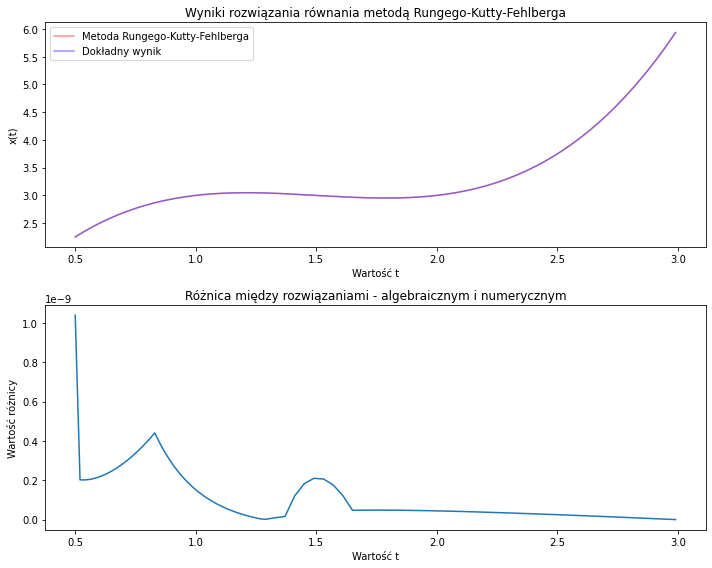

In [23]:
test_metody_Rungego_Kutty_Fehlberga()